"Geo Data Science with Python" 
### Notebook Lesson 06d

# Python Packages: Download data from the Web II

This lesson discusses several smaller Python Modules useful to download and retrieve Geoscience data from the internet. 

### Sources
This notebook is contains information from the following resources:

NetCDF
- NetCDF Module: https://unidata.github.io/netcdf4-python/

---

---
## CODE EXAMPLE 0: Download the Gistemp file again

In [ ]:
# 1. Import the module
import requests

In [ ]:
# 2. Define the URL
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz'
filename = 'gistemp250_GHCNv4.nc.gz'

In [ ]:
# 3. Use requests.get() to download the data behind that URL
r = requests.get(url, allow_redirects=True, stream=True)  

In [ ]:
# 4. Write the file to a new file on your computer
open(filename, 'wb').write(r.content)  #the previous two in one line

In [ ]:
# Unzip the file: bash command
!gunzip -f -k {filename} # unpacks the file, 
                         # -f forces command & overwrites files
                         # -k keeps both files .gz and unzipped one
# Information on gunzip: https://www.tutorialspoint.com/unix_commands/gunzip.htm

---
## CODE EXAMPLES 1: Working with NetCDF4 files

In [ ]:
# switch environtment if needed:
# %%bash
# source activate OOD-GEOFALL
# conda env list

In [ ]:
# Check, if installation of netCDF4 is available
from netCDF4 import Dataset
# and conda environment is correct
#!conda env list

### Import the data

In [ ]:
filename = 'gistemp250_GHCNv4.nc'
data = Dataset(filename, mode='r')

### Explore the data (Tutorial 1)

In [ ]:
# object type of the netcdf4 Dataset
type(data)

In [ ]:
# look into the netcdf4 Dataset
print(data)

In [ ]:
# call attribute `variables`
data.variables

In [ ]:
# call attibute `dimensions`
data.dimensions

### Retrieve info for variable and dimension content (Tutorial 2)

In [ ]:
# retrieve list of available variables in data
print ('Available variables: ')
print ([e for e in data.variables])

In [ ]:
# retrieve list of available dimension names 
print ('Available dimension names: ')
print ([e for e in data.dimensions])

# retrieve list of available dimension values
print ('Available dimension values: ')
print ([data.dimensions[e].size for e in data.dimensions])

### Retrieve info for individual variables (Tutorial 3)

In [ ]:
# printing info on variable 'lat'
data.variables['lat'] 

In [ ]:
# printing info on variable 'lon'
data.variables['lon']

In [ ]:
# printing info on variable 'tempanomaly'
data.variables['tempanomaly']

In [ ]:
data.variables['tempanomaly'].long_name

In [ ]:
data.variables['tempanomaly'].units

In [ ]:
data.variables['tempanomaly']._FillValue

### Retrieve variable content (Tutorial 4)

In [ ]:
data.variables['tempanomaly'][:]
data.variables['lon'][:]
# retrieves masked array
# the case for some netcdf variables
# for lat, lon, mask is empty

In [ ]:
type(data.variables['tempanomaly'][:])

In [ ]:
type(data.variables['lon'][:])

In [ ]:
# Check if variable lon contains a mask container (true)
data.variables['lon'].mask

In [ ]:
# Check if the mask container is filled (false)
data.variables['lon'][:].mask

### Retrieve variable content (Tutorial 5)

In [ ]:
# reference only the data array with:
lon = data.variables['lon'][:].data

In [ ]:
# content is a numpy array
type(lon)

In [ ]:
# writing content of all other interesting variables in data to separate numpy arrays
lat = data.variables['lat'][:].data
time = data.variables['time'][:].data
anom = data.variables['tempanomaly'][:].data
mask = data.variables['tempanomaly'][:].mask

In [ ]:
import numpy # need to import numpy now, if you have not done so before
print("Size of longitude array:",lon.shape)
print("Size of latitude array:",lat.shape)
print("Size of time array:",time.shape)
print("Size of data array:",anom.shape)
print("Size of data mask array:",mask.shape)

In [ ]:
print("Type of longitude array:",lon.dtype)
print("Type of latitude array:",lat.dtype)
print("Type of time array:",time.dtype)
print("Type of data array:",anom.dtype)
print("Type of data mask array:",mask.dtype)

### Examples for working with netCDF4 time values

In [ ]:
# time vector is in netCDF numbers, integer values
time

In [ ]:
# Recive unit of the time vector in data
data.variables['time'].units

In [ ]:
# convert the netcdf time values to a date with num2date
from netCDF4 import num2date
unts = data.variables['time'].units
time_dates = num2date(time,unts)  # string: 'days since 1800-01-01 00:00:00'
time_dates

In [ ]:
# date is given in netCDF's cftimec class:
type(time_dates[0])

In [ ]:
# receive a cftime data as string
time_dates[1].strftime()
# alternatively:
#str(time_dates[1])

In [ ]:
# convert cftime dates to netcdf time values with date2num
from netCDF4 import date2num
date2num(time_dates,unts)

In [ ]:
# convert datetime dates to netcdf time values with date2num
from datetime import datetime
date2num(datetime(2021, 9, 15),unts)

In [ ]:
# convert datetime date to an index corresponding to netcdf time unit
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2021, 1, 15),data.variables['time'])
timeindex

### Close the data object

In [ ]:
# closing the netCDF file
data.close()

---
## CODE EXAMPLES 2: Plotting data with matplotlib

### Plotting the data (Tutorial 6)


This netcdf file contains records from 1880-01-15 00:00:00 to 2021-09-15 00:00:00


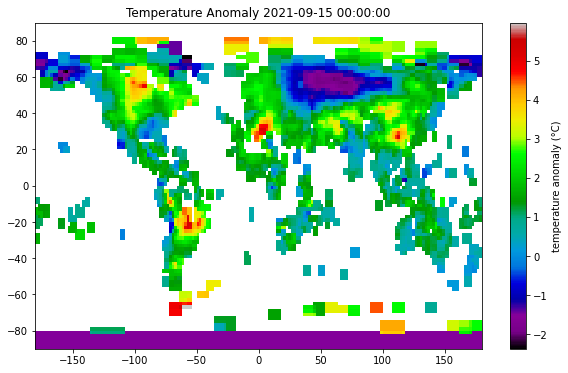

In [23]:
# %load gistemp_plot.py
"""
Created on Mon Oct 12 18:54:30 2021
@author: swerth
"""
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime


# read netcdf file
data = Dataset('gistemp250_GHCNv4.nc')

# Get index for a certain month, read this month from the data below
year = 2021
month = 9
timeindex = date2index(datetime(year, month, 15),
                       data.variables['time'])




# read data 
# --------
###  complete the code here
###  read lat, lon, time and anomaly into numpy arrays
###  read tempanomaly for month defined above
###  replace fill values with np.nan

# solution
# --------
###  complete the code here
###  read lat, lon, time into numpy arrays
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data

###  read tempanomaly (for month defined above) into numpy array
anom = data.variables['tempanomaly'][timeindex].data
anom_mask = data.variables['tempanomaly'][timeindex].mask

###  replace fill values
fillVal = data.variables['tempanomaly']._FillValue
anom[anom==fillVal] = np.nan



# plot data 
# --------

# converting the 1D coordinate arrays to a meshgrid
lonGrid, latGrid = np.meshgrid(lon,lat)

# plot data into map
fig = plt.figure(figsize=(10, 6))

# plotting the first last map in the time series
plt.pcolormesh(lonGrid,latGrid, anom, shading='auto',cmap='nipy_spectral') 
# try other colorbars: hot, hot_r, cool


# adding a colorbar and title
plt.title('Temperature Anomaly ' + str(datetime(year, month, 15)))
plt.colorbar(label=('temperature anomaly (' + u'\N{DEGREE SIGN}' + 'C)'))

# add plot limits
#plt.clim(-8, 8)


# get available time period in netcdf file and write to screen
t_units = data.variables['time'].units
time_beg = netCDF4.num2date(data.variables['time'][0],t_units)
time_end = netCDF4.num2date(data.variables['time'][-1],t_units)
print('\nThis netcdf file contains records from ' + str(time_beg) +
      ' to ' + str(time_end))

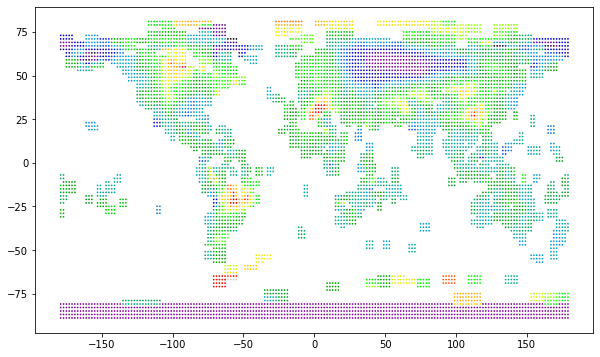

In [30]:
# alternative plot with plotscatter()
fig = plt.figure(figsize=(10, 6))
plt.scatter(lonGrid,latGrid, c=anom, cmap='nipy_spectral', s=0.5) 


### Plotting the mask

In [ ]:
plt.pcolormesh(lonGrid,latGrid, anom_mask, shading='auto') 
plt.colorbar(label=('temperature anomaly Mask'))

### Calculate global temp mean at each time, plot a time series (Tutorial 7)

In [9]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

# read netcdf dataset again
data = Dataset('gistemp250_GHCNv4.nc')

fillVal = data.variables['tempanomaly']._FillValue
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data

# retrieve data for all time steps, set empty values to nan
anomAll = data.variables['tempanomaly'][:].data
anomAll[anomAll==fillVal] = np.nan

In [10]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(time)     

In [11]:
# creating a numpy array of the same length, containing zeros
monthlyMeanAnom = np.zeros(NoOfMonths) 

In [12]:
# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    # using nanmean to make sure nan values are ignored
    monthlyMeanAnom[t] = np.nanmean(anomAll[t]) 

Text(0, 0.5, 'Temperature (Celsius)')

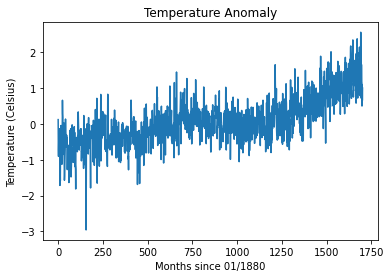

In [13]:
# plotting the time series of mean 'tos' (over the entire globe)
plt.plot(range(NoOfMonths),monthlyMeanAnom)

# adding labels
plt.title("Temperature Anomaly")
plt.xlabel('Months since 01/1880')
plt.ylabel('Temperature (Celsius)')